In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import nibabel as nib
import ipywidgets as widgets

In [2]:
# --- inputs ---
#base = "2Dresults/shortpulse/"
base = "review2DSimulation/"
ROI = np.load("ROIs/erode_C4ROI3D.npy")

datasetsshort = [ "focused0p2mmonepulse", "focused0p5mmonepulse", "planar0p2mmonepulse", "planar0p5mmonepulse"]
datasetsconti = ["planar0p2mmcontinuous","planar0p5mmcontinuous", "focused0p2mmcontinuous", "focused0p5mmcontinuous"]

methodtype = ["Mesh","Linear","NN"]
grids = ["0p2mm", "0p5mm"]
SLICE_INDEX_LIST  = [i for i in range(86,121)]

L2short = {d: {m: [] for m in methodtype} for d in datasetsshort}
L1short = {d: {m: [] for m in methodtype} for d in datasetsshort}
peak_diff = {d: {m: [] for m in methodtype} for d in datasetsshort}
focal_dist = {d: {m: [] for m in methodtype} for d in datasetsshort}
L2conti = {d: {m: [] for m in methodtype} for d in datasetsconti}
L1conti = {d: {m: [] for m in methodtype} for d in datasetsconti}

for s in SLICE_INDEX_LIST:
    print(s)
    for ds in datasetsshort:
        gtfile = base + "GroundTruth"  + "_slice" + str(s) + ds +"_PeakPressure.npy"
        GT = np.load(gtfile)
        RGT = np.where(ROI[:, :, s], GT, 0)
        idx = np.argmax(RGT)
        px, py= np.unravel_index(idx, RGT.shape)
        for m in methodtype:
            simfile = base + m + "_slice" + str(s) + ds + "_PeakPressure.npy"
            thissimulation = np.load(simfile)
            R = np.where(ROI[:, :, s], thissimulation, 0)
            idx = np.argmax(R)
            pxx, pyy = np.unravel_index(idx, R.shape)
            
            l2 = np.sum((RGT - R) ** 2)/np.sum(RGT ** 2)
            l1 = np.max(np.abs(np.abs(RGT) - np.abs(R)))/np.max(np.abs(RGT))
            focal = np.abs(np.max(np.abs(R)) - np.max(np.abs(RGT))) / np.max(np.abs(RGT))
            dist = np.sqrt((px - pxx)**2 + (py - pyy)**2)
            
            L2short[ds][m].append(l2 * 100)
            L1short[ds][m].append(l1 * 100)
            peak_diff[ds][m].append(focal)
            focal_dist[ds][m].append(dist)
            
    for ds in datasetsconti:
        gtfile = base + "GroundTruth"  + "_slice" + str(s) + ds +"_steadywave.npy"
        GT = np.load(gtfile)
        RGT = np.where(ROI[:, :, s], GT, 0)
        for m in methodtype:
            simfile = base + m + "_slice" + str(s) + ds + "_steadywave.npy"
            thissimulation = np.load(simfile)
            R = np.where(ROI[:, :, s], thissimulation, 0)
            
            l2 = np.sum((RGT - R) ** 2)/np.sum(RGT ** 2)
            l1 = np.max(np.abs(np.abs(RGT) - np.abs(R)))/np.max(np.abs(RGT))
            
            L2conti[ds][m].append(l2 * 100)
            L1conti[ds][m].append(l1 * 100)

86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


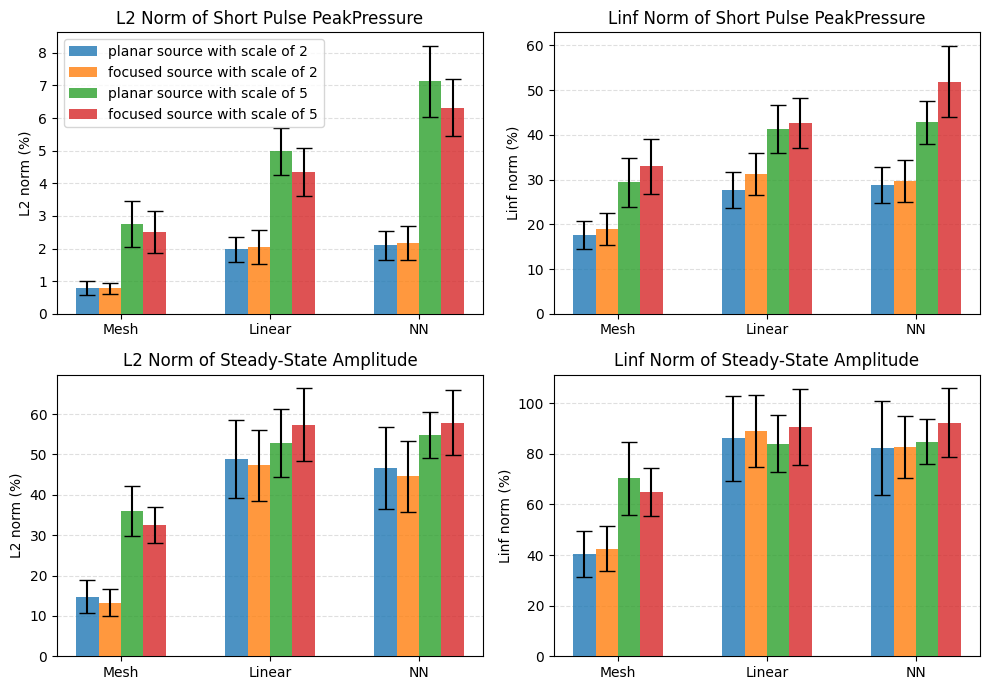

In [3]:
# --- aggregate stats ---# --- aggregate stats ---
subsetshort = ["planar0p2mmonepulse","focused0p2mmonepulse",  "planar0p5mmonepulse", "focused0p5mmonepulse"]
subsetconti = ["planar0p2mmcontinuous", "focused0p2mmcontinuous", "planar0p5mmcontinuous", "focused0p5mmcontinuous"]
L2shortmeans = {d: [np.mean(L2short[d][m]) for m in methodtype] for d in subsetshort}
L2shortstds  = {d: [np.std( L2short[d][m], ddof=1) for m in methodtype] for d in subsetshort}
L1shortmeans = {d: [np.mean(L1short[d][m]) for m in methodtype] for d in subsetshort}
L1shortstds  = {d: [np.std( L1short[d][m], ddof=1) for m in methodtype] for d in subsetshort}
L2contimeans = {d: [np.mean(L2conti[d][m]) for m in methodtype] for d in subsetconti}
L2contistds  = {d: [np.std( L2conti[d][m], ddof=1) for m in methodtype] for d in subsetconti}
L1contimeans = {d: [np.mean(L1conti[d][m]) for m in methodtype] for d in subsetconti}
L1contistds  = {d: [np.std( L1conti[d][m], ddof=1) for m in methodtype] for d in subsetconti}

x = np.arange(len(methodtype))
width = 0.15  # bar width
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
subsetnames = [
    "planar source with scale of 2",
    "focused source with scale of 2",
    "planar source with scale of 5",
    "focused source with scale of 5",
]

for i, dname in enumerate(subsetshort):
    offset = (i - (len(subsetshort) - 1) / 2) * width  # centers bars nicely
    label = subsetnames[i] if i < len(subsetnames) else str(dname)

    ax[0,0].bar(x + offset, L2shortmeans[dname], width, yerr=L2shortstds[dname], capsize=6, label=label, alpha=0.8, zorder=3)
    ax[0,1].bar(x + offset, L1shortmeans[dname], width, yerr=L1shortstds[dname], capsize=6, label=label, alpha=0.8, zorder=3)

for i, dname in enumerate(subsetconti):
    offset = (i - (len(subsetshort) - 1) / 2) * width  # centers bars nicely
    label = subsetnames[i] if i < len(subsetnames) else str(dname)

    ax[1,0].bar(x + offset, L2contimeans[dname], width, yerr=L2contistds[dname], capsize=6, label=label, alpha=0.8, zorder=3)
    ax[1,1].bar(x + offset, L1contimeans[dname], width, yerr=L1contistds[dname], capsize=6, label=label, alpha=0.8, zorder=3)

ax[0,0].set_xticks(x)
ax[0,0].set_xticklabels(methodtype, rotation=0)
ax[0,0].set_ylabel("L2 norm (%)")
ax[0,0].set_title("L2 Norm of Short Pulse PeakPressure")
ax[0,0].set_axisbelow(True)
ax[0,0].grid(axis="y", linestyle="--", alpha=0.4, zorder=0)
ax[0,0].legend(loc="upper left")

ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(methodtype, rotation=0)
ax[0,1].set_ylabel("Linf norm (%)")
ax[0,1].set_title("Linf Norm of Short Pulse PeakPressure")
ax[0,1].set_axisbelow(True)
ax[0,1].grid(axis="y", linestyle="--", alpha=0.4, zorder=0)
#ax[0,1].legend(loc="upper left")

ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(methodtype, rotation=0)
ax[1,0].set_ylabel("L2 norm (%)")
ax[1,0].set_title("L2 Norm of Steady-State Amplitude")
ax[1,0].set_axisbelow(True)
ax[1,0].grid(axis="y", linestyle="--", alpha=0.4, zorder=0)
#ax[1,0].legend(loc="upper left")

ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(methodtype, rotation=0)
ax[1,1].set_ylabel("Linf norm (%)")
ax[1,1].set_title("Linf Norm of Steady-State Amplitude")
ax[1,1].set_axisbelow(True)
ax[1,1].grid(axis="y", linestyle="--", alpha=0.4, zorder=0)
#ax[1,1].legend(loc="upper left")

plt.tight_layout()
plt.savefig("2DBarchart.svg", dpi=300, bbox_inches='tight')
plt.show()




In [20]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro, ttest_rel, wilcoxon

def stattest(data, subset):
    rows = []
    for d in subset:
        target = np.asarray(data[d]["Mesh"], float)
    
        pvals = []
        tmp = []
    
        for m in methodtype:
            if m == "Mesh":
                continue
    
            other = np.asarray(data[d][m], float)
    
            # paired, drop NaNs
            mask = np.isfinite(target) & np.isfinite(other)
            a, b = target[mask], other[mask]
            if len(a) < 3:
                continue
    
            diff = a - b  # negative => Mesh better
    
            sh_p = shapiro(diff).pvalue
    
            if sh_p >= 0.05:
                stat, p = ttest_rel(a, b)
                test = "paired_t"
                effect = diff.mean() / diff.std(ddof=1)  # Cohen's dz
            else:
                stat, p = wilcoxon(a, b)
                test = "wilcoxon"
                effect = stat / np.sqrt(len(diff))       # simple r approx
    
            tmp.append((m, a.mean(), b.mean(), diff.mean(), sh_p, test, stat, p, effect))
            pvals.append(p)
    
        # Bonferroni correction (simple and explicit)
        pvals = np.array(pvals)
        p_corr = np.minimum(pvals * len(pvals), 1.0)
    
        for (m, mt, mo, md, sh_p, test, stat, p, eff), pc in zip(tmp, p_corr):
            rows.append({
                "condition": d,
                "method": m,
                "mean_mesh": mt,
                "mean_other": mo,
                "mean_diff": md,
                "shapiro_p": sh_p,
                "test": test,
                "stat": stat,
                "p": p,
                "p_bonf": pc,
                "significant": pc < 0.05,
                "effect_size": eff
            })
    
    df = pd.DataFrame(rows)
    display(df)
stattest(L2short, subsetshort)
stattest(L1short, subsetshort)
stattest(L2conti, subsetconti)
stattest(L1conti, subsetconti)


,condition,method,mean_mesh,mean_other,mean_diff,shapiro_p,test,stat,p,p_bonf,significant,effect_size
0,planar0p2mmonepulse,Linear,0.791266,1.979103,-1.187837,0.993627,paired_t,-22.922200,2.946766e-22,5.893533e-22,True,-3.874559
1,planar0p2mmonepulse,NN,0.791266,2.102830,-1.311564,0.478200,paired_t,-23.278638,1.797932e-22,3.595864e-22,True,-3.934808
2,focused0p2mmonepulse,Linear,0.779209,2.049172,-1.269963,0.005543,wilcoxon,0.000000,5.820766e-11,1.164153e-10,True,0.000000
3,focused0p2mmonepulse,NN,0.779209,2.161321,-1.382112,0.020725,wilcoxon,0.000000,5.820766e-11,1.164153e-10,True,0.000000
4,planar0p5mmonepulse,Linear,2.757392,4.978060,-2.220668,0.564883,paired_t,-17.601716,1.179798e-18,2.359596e-18,True,-2.975233
5,planar0p5mmonepulse,NN,2.757392,7.119310,-4.361918,0.581201,paired_t,-18.203155,4.187717e-19,8.375434e-19,True,-3.076895
6,focused0p5mmonepulse,Linear,2.510972,4.343623,-1.832651,0.650260,paired_t,-13.840110,1.571915e-15,3.143829e-15,True,-2.339406
7,focused0p5mmonepulse,NN,2.510972,6.314950,-3.803978,0.264589,paired_t,-18.282824,3.658515e-19,7.317030e-19,True,-3.090361


,condition,method,mean_mesh,mean_other,mean_diff,shapiro_p,test,stat,p,p_bonf,significant,effect_size
0,planar0p2mmonepulse,Linear,17.626652,27.678280,-10.051628,0.256164,paired_t,-12.635843,2.126593e-14,4.253187e-14,True,-2.135847
1,planar0p2mmonepulse,NN,17.626652,28.761724,-11.135072,0.148649,paired_t,-13.195512,6.211065e-15,1.242213e-14,True,-2.230449
2,focused0p2mmonepulse,Linear,18.980802,31.238094,-12.257292,0.034700,wilcoxon,0.000000,5.820766e-11,1.164153e-10,True,0.000000
3,focused0p2mmonepulse,NN,18.980802,29.643762,-10.662960,0.554619,paired_t,-12.815111,1.428149e-14,2.856297e-14,True,-2.166149
4,planar0p5mmonepulse,Linear,29.424115,41.289764,-11.865649,0.478244,paired_t,-10.736937,1.830894e-12,3.661788e-12,True,-1.814874
5,planar0p5mmonepulse,NN,29.424115,42.805922,-13.381807,0.132662,paired_t,-10.121483,8.554880e-12,1.710976e-11,True,-1.710843
6,focused0p5mmonepulse,Linear,32.945264,42.611514,-9.666250,0.116138,paired_t,-6.314764,3.370509e-07,6.741017e-07,True,-1.067390
7,focused0p5mmonepulse,NN,32.945264,51.920228,-18.974964,0.004508,wilcoxon,0.000000,5.820766e-11,1.164153e-10,True,0.000000


,condition,method,mean_mesh,mean_other,mean_diff,shapiro_p,test,stat,p,p_bonf,significant,effect_size
0,planar0p2mmcontinuous,Linear,14.771111,48.861418,-34.090307,0.226059,paired_t,-26.282294,3.586739e-24,7.173478e-24,True,-4.442518
1,planar0p2mmcontinuous,NN,14.771111,46.579579,-31.808468,0.102093,paired_t,-23.715764,9.898396e-23,1.979679e-22,True,-4.008696
2,focused0p2mmcontinuous,Linear,13.252004,47.285745,-34.033741,0.477976,paired_t,-24.282279,4.633210e-23,9.266421e-23,True,-4.104454
3,focused0p2mmcontinuous,NN,13.252004,44.606810,-31.354805,0.020054,wilcoxon,0.000000,5.820766e-11,1.164153e-10,True,0.000000
4,planar0p5mmcontinuous,Linear,35.889702,52.897327,-17.007626,0.256597,paired_t,-14.223963,7.084857e-16,1.416971e-15,True,-2.404289
5,planar0p5mmcontinuous,NN,35.889702,54.748017,-18.858315,0.067672,paired_t,-18.022533,5.698756e-19,1.139751e-18,True,-3.046364
6,focused0p5mmcontinuous,Linear,32.538320,57.399373,-24.861053,0.011864,wilcoxon,0.000000,5.820766e-11,1.164153e-10,True,0.000000
7,focused0p5mmcontinuous,NN,32.538320,57.818686,-25.280366,0.084707,paired_t,-14.852077,1.987479e-16,3.974957e-16,True,-2.510459


,condition,method,mean_mesh,mean_other,mean_diff,shapiro_p,test,stat,p,p_bonf,significant,effect_size
0,planar0p2mmcontinuous,Linear,40.441749,86.137251,-45.695502,0.026880,wilcoxon,0.000000,5.820766e-11,1.164153e-10,True,0.000000
1,planar0p2mmcontinuous,NN,40.441749,82.365312,-41.923563,0.456178,paired_t,-17.147116,2.631115e-18,5.262230e-18,True,-2.898392
2,focused0p2mmcontinuous,Linear,42.515921,89.227216,-46.711295,0.343376,paired_t,-19.956950,2.381816e-20,4.763633e-20,True,-3.373340
3,focused0p2mmcontinuous,NN,42.515921,82.743501,-40.227580,0.085879,paired_t,-18.722196,1.751682e-19,3.503364e-19,True,-3.164629
4,planar0p5mmcontinuous,Linear,70.314308,83.991195,-13.676887,0.548086,paired_t,-6.128836,5.862857e-07,1.172571e-06,True,-1.035962
5,planar0p5mmcontinuous,NN,70.314308,84.850344,-14.536036,0.165969,paired_t,-5.965106,9.558713e-07,1.911743e-06,True,-1.008287
6,focused0p5mmcontinuous,Linear,64.898884,90.723173,-25.824288,0.665003,paired_t,-10.973252,1.026168e-12,2.052336e-12,True,-1.854818
7,focused0p5mmcontinuous,NN,64.898884,92.403815,-27.504931,0.275424,paired_t,-12.294502,4.586029e-14,9.172058e-14,True,-2.078150


In [4]:
stophere

NameError: name 'stophere' is not defined

In [ ]:
# --- inputs ---
methodtype = ["Mesh","Linear","NN"]
base = "3Dresults"
datasets = ["0p2mm_focused_onepulse", "0p2mm_planar_onepulse", "0p5mm_focused_onepulse", "0p5mm_planar_onepulse"]
#datasets = ["0p2mm_focused_continuous", "0p2mm_planar_continuous", "0p5mm_focused_continuous", "0p5mm_planar_continuous"]

# --- compute MSE values for each dataset + method ---
L2 = {d: {m: [] for m in methodtype} for d in datasets}
L1 = {d: {m: [] for m in methodtype} for d in datasets}
peak_diff = {d: {m: [] for m in methodtype} for d in datasets}
focal_dist = {d: {m: [] for m in methodtype} for d in datasets}

ROI = np.load("ROIs/erode_C4ROI3D.npy")

for ds in datasets:
    gtfile = "3Dresults/3Dsimulation_GroundTruth_"+ds +".npy"
    GT = np.load(gtfile)
    R = np.full(ROI.shape, 0, dtype=float)
    R[ROI>0] = GT
    idx = np.argmax(R)
    px, py, pz = np.unravel_index(idx, R.shape)
    for m in methodtype:
        simfile = base + "/3Dsimulation_" + m + "_" + ds + ".npy"
        thissimulation = np.load(simfile)
        l2 = np.sum((GT - thissimulation) ** 2)/np.sum(GT ** 2)
        L2[ds][m].append(l2*100)
        
        l1 = np.max(np.abs(np.abs(GT) - np.abs(thissimulation)))/np.max(np.abs(GT))
        L1[ds][m].append(l1*100)

        focal = np.abs(np.max(np.abs(GT)) - np.max(np.abs(thissimulation))/np.max(GT))
        peak_diff[ds][m].append(focal)
        
        R = np.full(ROI.shape, 0, dtype=float)
        R[ROI>0] = thissimulation
        idx = np.argmax(R)
        pxx, pyy, pzz = np.unravel_index(idx, R.shape)
        dist = np.sqrt((px - pxx)**2 + (py - pyy)**2 +(pz - pzz)**2)
        focal_dist[ds][m].append(dist/10)

In [ ]:
cfls = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05]
peakpressure = []
L2 = []

c0p05 = np.load(r"2DConvergence/GroundTruth_slice0.05focused0p5mmonepulse_PeakPressure.npy")
for c in cfls:
    pp = np.load(r"2DConvergence/GroundTruth_slice"+str(c)+"focused0p5mmonepulse_PeakPressure.npy")
    peakpressure.append(np.sum(pp)/np.sum(c0p05))
    #c0p05 = peakpressure[0]
    L2.append(np.sum((c0p05 - pp) ** 2)/np.sum(c0p05 ** 2)*100)
    print(np.sum(pp))
plt.plot(cfls,L2)